----------------------------------
Company Turnover Check

----------------------------------
M606 Machine Learning


Dr. Mohammad Mahdavi

----------------------------------


Student Name:


Mohamed Hassan Kamel Amin Mohamed


Student Number: GH1025497

----------------------------------

Colab Project Link: [link Here](https://colab.research.google.com/drive/1a3TK7SVxwMNzlLIyTg8R4mOOQetpII8r?usp=sharing)



Intake: April 2024

----------------------------------


**About Dataset**

**Context:** This dataset includes details about a company's workforce, such as employment-related variables, job history, demographics, and educational backgrounds. It has been anonymised to safeguard privacy while still delivering vital information about the workforce.

**Refrence from kaggle.com:** [Link Here](https://www.kaggle.com/datasets/tawfikelmetwally/employee-dataset)


**Target Class:  "LeaveOrNo"**

**Features:**

**Education:** Employee educational qualities include their degree, institution, and field of study.

**JoiningYear:** The year each employee entered the company, indicating the length of their tenure.

**City:** The city where each employee lives or works.

**PaymentTier:** The classification of personnel into various salary levels.

**Age:** The age of each employee, providing demographic information.

**Gender:** Employee gender identity, with an emphasis on diversity analysis.

**EverBenched:** This indicates whether an employee has a gap without assigned job.

**Employees' current domain experience:** is measured by the number of years they have worked in that field.


**Installing and importing libraries**

In [ ]:
!pip install seaborn
import pandas as pd
import sklearn.model_selection
import sklearn.metrics
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import sklearn.svm
import sklearn.tree
import sklearn.neighbors
import seaborn as sns
import matplotlib.pyplot as plt

**Loading Dataset**

In [ ]:
df = pd.read_csv("/content/Employee.csv")
df.head(3)

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0



**Data Explorationt**


 Explor columns *datatybe*

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4653 entries, 0 to 4652
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Education                  4653 non-null   object
 1   JoiningYear                4653 non-null   int64 
 2   City                       4653 non-null   object
 3   PaymentTier                4653 non-null   int64 
 4   Age                        4653 non-null   int64 
 5   Gender                     4653 non-null   object
 6   EverBenched                4653 non-null   object
 7   ExperienceInCurrentDomain  4653 non-null   int64 
 8   LeaveOrNot                 4653 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 327.3+ KB


Look for Null values in the DataFrame

In [ ]:
df.isnull().sum()

Education                    0
JoiningYear                  0
City                         0
PaymentTier                  0
Age                          0
Gender                       0
EverBenched                  0
ExperienceInCurrentDomain    0
LeaveOrNot                   0
dtype: int64

In [ ]:
df.duplicated().sum()

1889

**Data Preprocessing and Feature *Engineering*:**

Calculate the years of work based on the current year and the joining year.

*I supposed that this dataset was published at 2023, according to this I start calculating the number of working years for each employee.

In [ ]:
df['yearsOfWork'] = 2023 - df['JoiningYear']
df.head(3)

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot,yearsOfWork
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0,6
1,Bachelors,2013,Pune,1,28,Female,No,3,1,10
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0,9


Drop JoiningYear coulom scince we will use yearsOfWork instaed, Move target coulom "LeaveOrNot" in to the target dataset "y".

Split x, y into trining, testing data.

In [ ]:
x = df.drop(["LeaveOrNot", "JoiningYear"], axis=1)
y = df["LeaveOrNot"]

x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, test_size=0.25, random_state=30)
df.head(3)

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot,yearsOfWork
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0,6
1,Bachelors,2013,Pune,1,28,Female,No,3,1,10
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0,9


**Encoding  and scaling Variables:**:

convert categorical variables into numerical once.

Use StandardScaler, numerical_attributes and one hot scaler on categorical_attributes.


Train the colum transformer on the trining dataset, to privent data leakage.

Apply colum transformer into both trining and testing dataset.

In [ ]:
numerical_attributes = x_train.select_dtypes(include=["int64"]).columns
categorical_attributes = x_train.select_dtypes(include=["object"]).columns
print("numerical attributes:", numerical_attributes)
print("Categorical attributes:", categorical_attributes)
ct= sklearn.compose.ColumnTransformer([
    ("standard_scaling", sklearn.preprocessing.StandardScaler(),numerical_attributes),
    ("one-hot_scaling", sklearn.preprocessing.OneHotEncoder(handle_unknown="ignore"),categorical_attributes)
])
ct.fit(x_train)
x_train = ct.fit_transform(x_train)
x_test = ct.transform(x_test)

numerical attributes: Index(['PaymentTier', 'Age', 'ExperienceInCurrentDomain', 'yearsOfWork'], dtype='object')
Categorical attributes: Index(['Education', 'City', 'Gender', 'EverBenched'], dtype='object')


**Data training:**


compare the Accuracy of the trained models from

**Decision Tree**

(model_1) using hyperparameters for criteria, max_depth, and min_samples_split, class_weight.


In [ ]:
parameters_grid = {
    "criterion": ["gini", "entropy"],
    "max_depth": range(1, 20, 3),
    "min_samples_split" : range(2, 20, 3),
    "class_weight": [None, "balanced"]
}

model_1 = sklearn.model_selection.GridSearchCV(sklearn.tree.DecisionTreeClassifier(),
                                               parameters_grid, scoring = "accuracy", cv=5, n_jobs = -1)

model_1.fit(x_train, y_train)
print("Accuracy of best decision tree classfier = {:.2f}".format(model_1.best_score_))
print("Best found hyperparameters of decision tree classfier = {}".format(model_1.best_params_))

Accuracy of best decision tree classfier = 0.84
Best found hyperparameters of decision tree classfier = {'class_weight': None, 'criterion': 'entropy', 'max_depth': 10, 'min_samples_split': 8}


**SVM**


(model_2) with a grid for the kernel type and the regularisation parameter C, class_weight.

In [ ]:
parameters_grid = {
    "kernel": ["linear", "rbf", "poly"],
    "C": [0.001, 0.01, 0.1, 1, 10, 100],
    "class_weight": [None, "balanced"]
}
model_2 = sklearn.model_selection.GridSearchCV(sklearn.svm.SVC(),
                                               parameters_grid, scoring= "accuracy", cv=5, n_jobs = -1)

model_2.fit(x_train, y_train)
print("Accuracy of best SVM classfier = {:.2f}".format(model_2.best_score_))
print("Best found hyperparameters of SVM classifier = {}".format(model_2.best_params_))

Accuracy of best SVM classfier = 0.85
Best found hyperparameters of SVM classifier = {'C': 10, 'class_weight': None, 'kernel': 'rbf'}


KNN

(model_3) using a grid to track the number of neighbors and distance metric.

In [ ]:
parameters_grid = {
     "n_neighbors": [1, 5, 10, 15, 20],
     "metric": ["minkowski", "euclidean", "manhattan"]
}

model_3 = sklearn.model_selection.GridSearchCV(sklearn.neighbors.KNeighborsClassifier(),
                                                 parameters_grid, scoring="accuracy", cv=5, n_jobs = -1)

model_3.fit(x_train, y_train)
print("Accuracy of best KNN classfier = {:.2f}".format(model_3.best_score_))
print("Best found hyperparameters of KNN classifier = {}".format(model_3.best_params_))

Accuracy of best KNN classfier = 0.82
Best found hyperparameters of KNN classifier = {'metric': 'manhattan', 'n_neighbors': 10}


**Model Evaluation:**

The best model tranned in accurcy was from SVC "model_2" so will use it on the training data.

**Results Visualization:**

Compare the predictions of the trained data aginest actual data through precision, recall, F1 and  confugan matrix

Accuracy = 0.8591065292096219
Precision = [0.84669811 0.89240506]
Recall = [0.95478723 0.68446602]
F1-Score = [0.8975     0.77472527]
Confusion Matrix: 
 [[718  34]
 [130 282]]
Classifiation Report: 
               precision    recall  f1-score   support

           0       0.85      0.95      0.90       752
           1       0.89      0.68      0.77       412

    accuracy                           0.86      1164
   macro avg       0.87      0.82      0.84      1164
weighted avg       0.86      0.86      0.85      1164



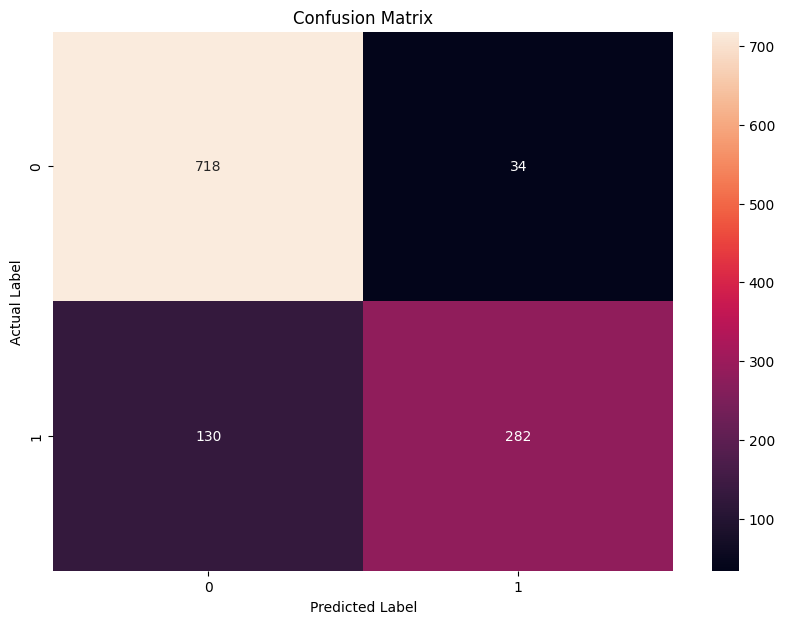

In [ ]:
y_predicted = model_2.predict(x_test)
accuracy = sklearn.metrics.accuracy_score(y_test, y_predicted)
precision, recall, f1, support = sklearn.metrics.precision_recall_fscore_support(y_test, y_predicted)
cr = sklearn.metrics.classification_report(y_test, y_predicted)
print("Accuracy =", accuracy)
print("Precision =", precision)
print("Recall =", recall)
print("F1-Score =", f1)
print("Classifiation Report: \n", cr)

conf_matrix = sklearn.metrics.confusion_matrix(y_test, y_predicted)

plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='g')
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

**In conclusion**


The Dataset demonstrates the effective use of data preprocessing, feature engineering, and model training techniques to predict employee retention. The comprehensive approach, including hyperparameter tuning and cross-validation, ensured the development of accurate and reliable predictive models. This predictive capability is invaluable for understanding workforce dynamics and making informed HR decisions.

*The acuracy is not very high becouse maybe  was important feuture not including in the dataset.